# Decision Tree

## Import libraries

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.text import Annotation

print("Libraries imported!")

Libraries imported!


## Model Architecture

In [155]:
class DecisionTree():

    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        y_pred = []
        for x in X:
            node = self.tree_
            while node.left:
                if x[node.feature_idx] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            y_pred.append(node.majority_class)

        return y_pred


    def _grow_tree(self, X, y, depth=0):
        # provides the count of each class in the current y split
        samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        # finds the most occuring class in the current split
        majority_class = np.argmax(samples_per_class)
        # assigns the majoiry class to the node for classification
        node = Node(majority_class=majority_class)
        if depth < self.max_depth:
            feature_idx, threshold = self._best_split(X, y)
            if feature_idx is not None:
                node.num_samples = len(y)
                # splits the data according to the threshold
                left_indices = X[:, feature_idx] < threshold
                X_left, y_left = X[left_indices], y[left_indices]
                X_right, y_right = X[~left_indices], y[~left_indices]
                node.feature_idx = feature_idx
                node.threshold = threshold
                # recursive call for the left and right split
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
                
        
        return node
    
    def _best_split(self, X, y):
        m = y.size

        # if there is only one class in y, return None, None
        if m <= 1:
            print("hello")
            return None, None

        # initialize the best gini index with gini index of parent node
        best_gini = self._gini(y)

        # initialize the best feature and threshold with None, None
        best_feature_idx, best_threshold = None, None

        for feature_idx in range(self.n_features_):
            # Sort feature values and corresponding class labels
            thresholds = sorted(X[:, feature_idx])

            for i in range(1, m):
                # splits the data according to the thresholds
                left_indices = X[:, feature_idx] < thresholds[i]
                y_left = y[left_indices]
                y_right = y[~left_indices]
                # find gini index for left and right splits and then calculate the weighted average of it
                gini_left  = self._gini(y_left)
                gini_right = self._gini(y_right)
                weighted_gini = (len(y_left) / len(y)) * gini_left + (len(y_right) / len(y)) * gini_right
                if thresholds[i] == thresholds[i - 1]:
                    continue

            # Update best index and threshold if current Gini is lower
                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_feature_idx = feature_idx
                    best_threshold = (thresholds[i] + thresholds[i - 1]) / 2

        return best_feature_idx, best_threshold


    def _gini(self, y):
         # returns the count of each value in the array
        _, counts = np.unique(y, return_counts=True)
        # calculate the gini impurity
        impurity = 1 - np.sum(np.square(counts / len(y)))
        return impurity
    
    def traverse_tree(self, node=None, depth=0):
        if node is None:
            node = self.tree_
        if node.is_leaf_node():
            print("  " * depth + f"Leaf Node: Majority class = {node.majority_class}")
        else:
            print("  " * depth + f"Node: Majority class = {node.majority_class}")
            if node.feature_idx is not None:
                print("  " * depth + f"  Split on feature {node.feature_idx} with threshold {node.threshold}")
                print("  " * depth + "  Left:")
                self.traverse_tree(node.left, depth + 1)
                print("  " * depth + "  Right:")
                self.traverse_tree(node.right, depth + 1)
        print("Number of samples in node: {}".format(node.num_samples))

class Node():
    
    def __init__(self, majority_class):
        self.majority_class = majority_class  
        self.feature_idx = None
        self.threshold = None
        self.left = None
        self.right = None
        self.num_samples = None

    def is_leaf_node(self):
        return self.left is None and self.right is None


## Dataset

In [156]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model

In [157]:
tree = DecisionTree(max_depth=3)
tree.fit(X_train, y_train)

In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


## Tree traversal

In [159]:
tree.traverse_tree()

Node: Majority class = 1
  Split on feature 2 with threshold 2.45
  Left:
  Leaf Node: Majority class = 0
Number of samples in node: None
  Right:
  Node: Majority class = 1
    Split on feature 2 with threshold 4.75
    Left:
    Node: Majority class = 1
      Split on feature 3 with threshold 1.65
      Left:
      Leaf Node: Majority class = 1
Number of samples in node: None
      Right:
      Leaf Node: Majority class = 2
Number of samples in node: None
Number of samples in node: 37
    Right:
    Node: Majority class = 2
      Split on feature 3 with threshold 1.75
      Left:
      Leaf Node: Majority class = 1
Number of samples in node: None
      Right:
      Leaf Node: Majority class = 2
Number of samples in node: None
Number of samples in node: 43
Number of samples in node: 80
Number of samples in node: 120


## Visualization

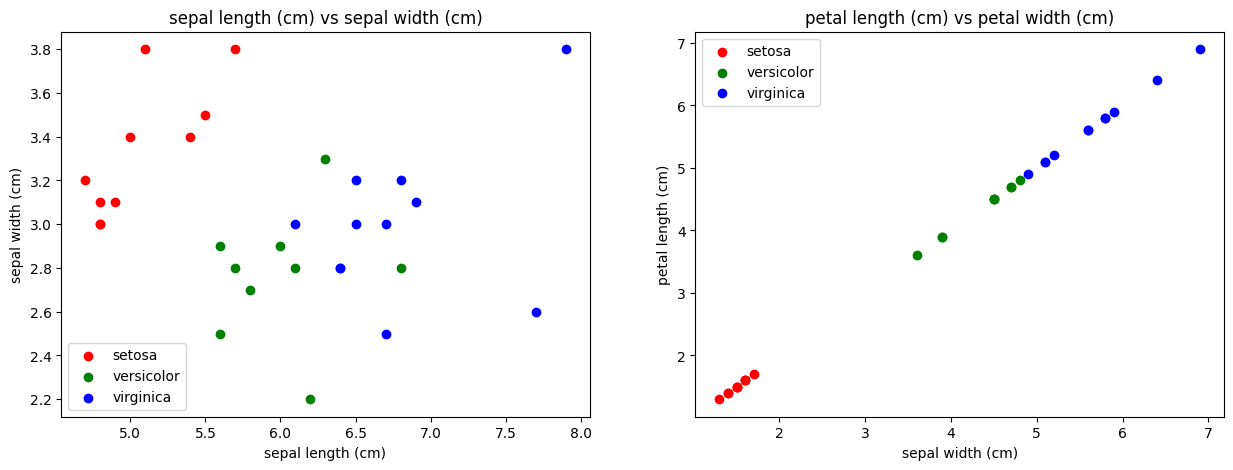

In [160]:
colors = ['r', 'g', 'b']

target_names = iris.target_names 
feature_names = iris.feature_names

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, target_name in enumerate(target_names):
    ax[0].scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], c=colors[i], label=target_name)

ax[0].set_xlabel(feature_names[0])
ax[0].set_ylabel(feature_names[1])
ax[0].set_title(f"{feature_names[0]} vs {feature_names[1]}")
ax[0].legend()


for i, target_name in enumerate(target_names):
    ax[1].scatter(X_test[y_test==i, 2], X_test[y_test==i, 2], c=colors[i], label=target_name)

ax[1].set_xlabel(feature_names[1])
ax[1].set_ylabel(feature_names[2])
ax[1].set_title(f"{feature_names[2]} vs {feature_names[3]}")
ax[1].legend()

